# Stock Forecasting using statsmodels

### Forecasts

https://www.statsmodels.org/stable/index.html  
https://github.com/statsmodels/statsmodels  


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2010-01-01' # input 
end = '2022-07-22'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,3537130000
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3830.850098,3414470000
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,3160350000
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,3452150000
2022-07-21,3955.469971,3999.290039,3927.639893,3998.949951,3998.949951,3586030000


In [5]:
df_month = df.resample('M').last()

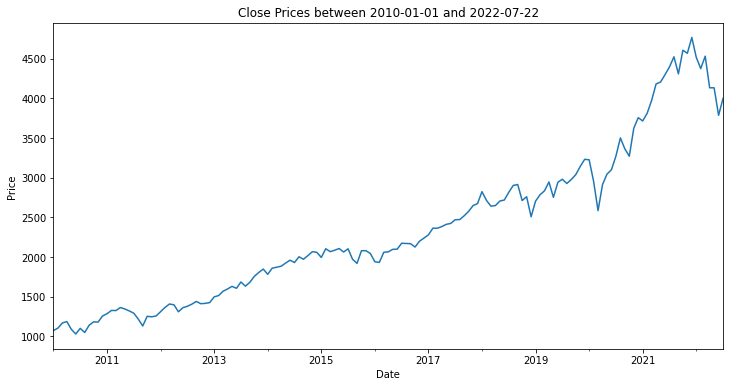

In [6]:
plt.figure(figsize = (12, 6))
plt.title('Close Prices between {} and {}'.format(
    start,
    end
))
df_month['Adj Close'].plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [7]:
df_month.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-31,1087.609985,1096.449951,1071.589966,1073.869995,1073.869995,5412850000
2010-02-28,1103.099976,1107.239990,1097.560059,1104.489990,1104.489990,3945190000
2010-03-31,1171.750000,1174.560059,1165.770020,1169.430054,1169.430054,4484340000
2010-04-30,1206.770020,1207.989990,1186.319946,1186.689941,1186.689941,6048260000
2010-05-31,1102.589966,1102.589966,1084.780029,1089.410034,1089.410034,4871210000


In [8]:
df_month.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-31,4599.020020,4603.069824,4530.410156,4530.410156,4530.410156,3782040000
2022-04-30,4253.750000,4269.680176,4124.279785,4131.930176,4131.930176,3943480000
2022-05-31,4151.089844,4168.339844,4104.879883,4132.149902,4132.149902,5192220000
2022-06-30,3785.989990,3818.989990,3738.669922,3785.379883,3785.379883,4032260000
2022-07-31,3955.469971,3999.290039,3927.639893,3998.949951,3998.949951,3586030000


In [9]:
df_month.index.freq

<MonthEnd>

In [10]:
df_month=df_month.rename(columns={"Close": "Price"}, inplace=False)
df_month
df2 = df_month.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'])
df2

,Price
Date,
2010-01-31,1073.869995
2010-02-28,1104.489990
2010-03-31,1169.430054
2010-04-30,1186.689941
2010-05-31,1089.410034
...,...
2022-03-31,4530.410156
2022-04-30,4131.930176
2022-05-31,4132.149902


<AxesSubplot:xlabel='Date'>

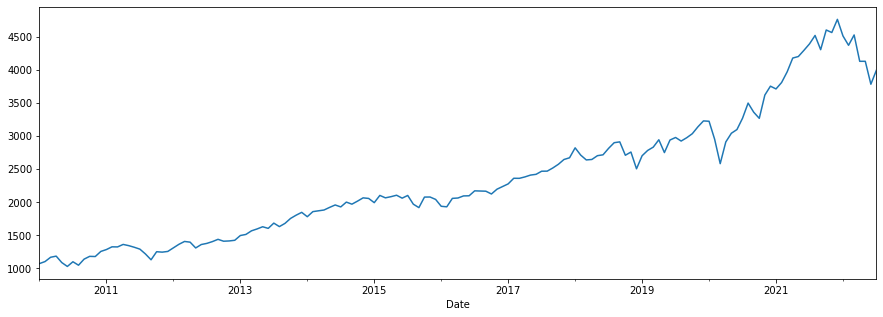

In [11]:
close = df2['Price']
close.plot(figsize=(15, 5))

In [12]:
# Construct the model
mod = sm.tsa.SARIMAX(close, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())



                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  151
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -931.172
Date:                Sat, 23 Jul 2022   AIC                           1868.345
Time:                        20:14:17   BIC                           1877.397
Sample:                    01-31-2010   HQIC                          1872.022
                         - 07-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.4497     19.725      0.479      0.632     -29.210      48.110
ar.L1          0.9962      0.008    131.778      0.000       0.981       1.011
sigma2      1.288e+04   1050.024     12.263      0.0

In [13]:
print(res.forecast())

2022-08-31    3993.253217
Freq: M, dtype: float64


In [14]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast()

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

Price              mean     mean_se  mean_ci_lower  mean_ci_upper
2022-08-31  3993.253217  113.474222    3806.604731    4179.901703


In [15]:
print(res.forecast(steps=2))

2022-08-31    3993.253217
2022-09-30    3987.578060
Freq: M, Name: predicted_mean, dtype: float64


In [16]:
fcast_res2 = res.get_forecast(steps=2)
# Note: since we did not specify the alpha parameter, the
# confidence level is at the default, 95%
print(fcast_res2.summary_frame())

Price              mean     mean_se  mean_ci_lower  mean_ci_upper
2022-08-31  3993.253217  113.474222    3770.847829    4215.658605
2022-09-30  3987.578060  160.173161    3673.644433    4301.511687


In [17]:
print(res.forecast('2022-12-31'))

2022-08-31    3993.253217
2022-09-30    3987.578060
2022-10-31    3981.924398
2022-11-30    3976.292150
2022-12-31    3970.681234
Freq: M, Name: predicted_mean, dtype: float64


In [18]:
fcast_res3 = res.get_forecast('2022-12-31')
print(fcast_res3.summary_frame())

Price              mean     mean_se  mean_ci_lower  mean_ci_upper
2022-08-31  3993.253217  113.474222    3770.847829    4215.658605
2022-09-30  3987.578060  160.173161    3673.644433    4301.511687
2022-10-31  3981.924398  195.800571    3598.162331    4365.686465
2022-11-30  3976.292150  225.664343    3533.998165    4418.586134
2022-12-31  3970.681234  251.824865    3477.113568    4464.248900


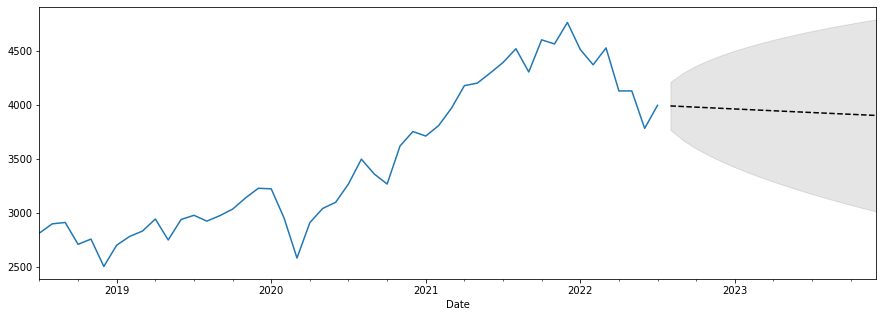

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
close.loc['2018-07-31':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast('2023-12-31').summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'].values, fcast['mean_ci_upper'].values, color='k', alpha=0.1)
plt.show()